# **Модель Вольтерра-Лотке**


## 1.   Постановка задачи
Рассмотрите модель хищник–жертва Вольтерра́–Лотке простой экосистемы$$
\left\{
\begin{array}{l}
\frac{\displaystyle dr}{\displaystyle dt} = 2r - \alpha r f, \\[.5em]
\frac{\displaystyle df}{\displaystyle dt} = -f + \alpha r f, 
\end{array}
\right.
$$$$
r(0) = r_0,\qquad
f(0) = f_0,
$$где $f$ – численность лис, $r$ – численность кроликов ($\alpha$, например, $0.01$; $r_0$, $f_0$ могут изменяться от нескольких единиц до нескольких тысяч)

Напишите функцию, на вход которой можно подавать величины $\alpha$, $r_0$, $f_0$. По заданным параметру и начальным условиям функция должна строить три графика: графики зависимости $f(t)$, $r(t)$ и фазовую траекторию (траекторию в плоскости $(r,f)$). Обратите внимание, что $r(t)\ge 0$, $f(t)\ge 0$.

Экспериментально попытайтесь найти все качественно различные фазовые траектории. Изобразите фазовый портрет – коллекцию фазовых траекторий. Каков содержательный смысл в соответствующих этим траекториям решениях?
## 2.   Решение
Классическая модель Вольтерра-Лотке описывает ее системой двуx дифференциальных уравнений$$
\left\{
\begin{array}{l}
   \frac{\displaystyle dx}{\displaystyle dt} = \alpha x - \gamma x y,\\
   \frac{\displaystyle dy}{\displaystyle dt} = -\beta y + \gamma x y \\
\end{array}
\right.
$$и начальными условиями$$
\left\{
\begin{array}{l}
   x(0) = x_0,\\
   y(0) = y_0.\\
\end{array}
\right.
$$Здесь $x$ - численность жертв, $y$ - численность хищников, $\alpha$, $\beta$, $\gamma$ - некоторые константы. В нашем случае $\alpha$ = $2$, $\beta$ = $1$, $\gamma$ = $\alpha$.
Подключим необходимые библиотеки.

In [139]:
import numpy as np
import matplotlib.pyplot as plt

Подготовим функции, вычисляющие правую часть дифференциальных уравнений.

In [140]:
def fun1(t, y, x, alpha):
  return (2 - alpha*y)*x

def fun2(t, x, y, alpha):
  return (alpha*x - 1)*y

Решим систему методом Эйлера. Расчетные формулы метода Эйлера:$$
t_{k+1} = t_k + h,
\qquad
y_{k+1} = y_k + h f_1(t_k, y_k, x_k), 
\qquad
x_{k+1} = x_k + h f_2(t_k, y_k, x_k), 
\qquad
(k=0,1,2,\dots).
$$

In [141]:
def euler(t0, T, y0, h, x0, alpha):

    n = int((T - t0)/h) + 1
    t = np.zeros(n)
    y = np.zeros(n)
    x = np.zeros(n)

    t[0] = t0
    y[0] = y0
    x[0] = x0

    for k in range(n - 1):
        t[k + 1] = t[k] + h
        y[k + 1] = y[k] + h*fun2(t[k], x[k], y[k], alpha)
        x[k+1] = x[k] + h*fun1(t[k], y[k], x[k], alpha)

    return t, y, x

Напишем функцию для построения графиков.

In [142]:
def graphic(x0, y0, alpha):
  t0 = 0
  T  = 30
  h  = 0.00001
  t, y, x = euler(t0, T, y0, h, x0, alpha)
  plt.plot(t,  y,  label='Foxes')
  plt.plot(t, x, label = 'Rabbits')
  plt.legend()
  plt.xlabel("Time")
  plt.ylabel("Population")
  plt.show()
  c = np.arange(0.1, .9, .1)*np.exp(0.1);
  for k in range (0,8):
    plt.plot(np.outer(x,c[k]), np.outer(y, c[k]), label = 'r0 = ' + str(round((x0*c)[k])) + ', f0 = ' + str(round((y0*c)[k])))
  plt.plot(x, y, label = 'r0 = ' + str(x0) + ', f0 = ' + str(y0))
  plt.legend()
  plt.xlabel("Rabbits")
  plt.ylabel("Foxes")
  plt.show()

Построим графики зависимости численности от лис и кроликов от времени и фазовую траекторию.

In [ ]:
x0 = input()
y0 = input()
alpha = input()
x0 = int(x0)
y0 = int(y0)
alpha = float(alpha)
graphic(x0, y0, alpha)

При $\alpha$ = 0.01, $r_0$ = 10, $f_0$ = 5

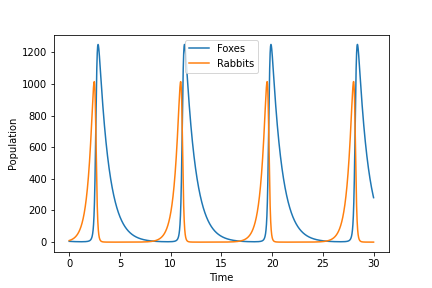
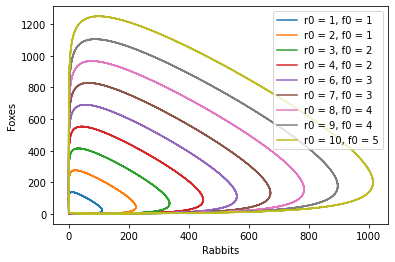

При $\alpha$ = 2, $r_0$ = 10, $f_0$ = 5

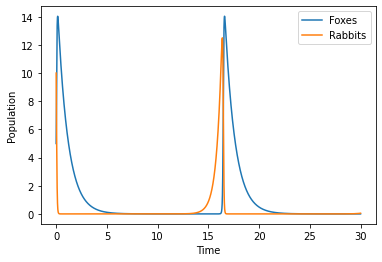
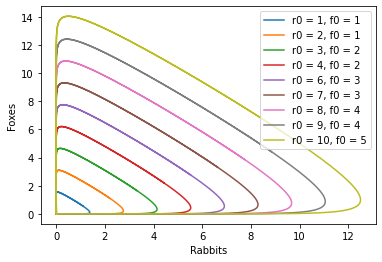

При $\alpha$ = 0, $r_0$ = 10, $f_0$ = 5

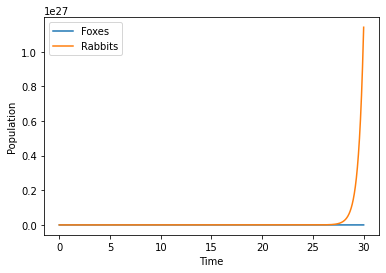
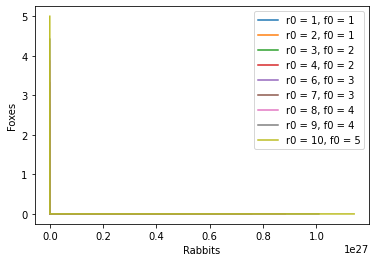



## 3.   Выводы
1. Если $\alpha<1$, то максимальное число лис больше, чем кроликов.

2. Если $\alpha>1$, то численность кроликов и лис растет медленнее, чем в первом случае.

3. Если $\alpha = 0$, то популяции не взаимодействуют и кролики размножаются со скоростью, пропорциональной их численности, а лисы вымирают. 